# demo for pynq write/read the PL DDR4 with dtbo

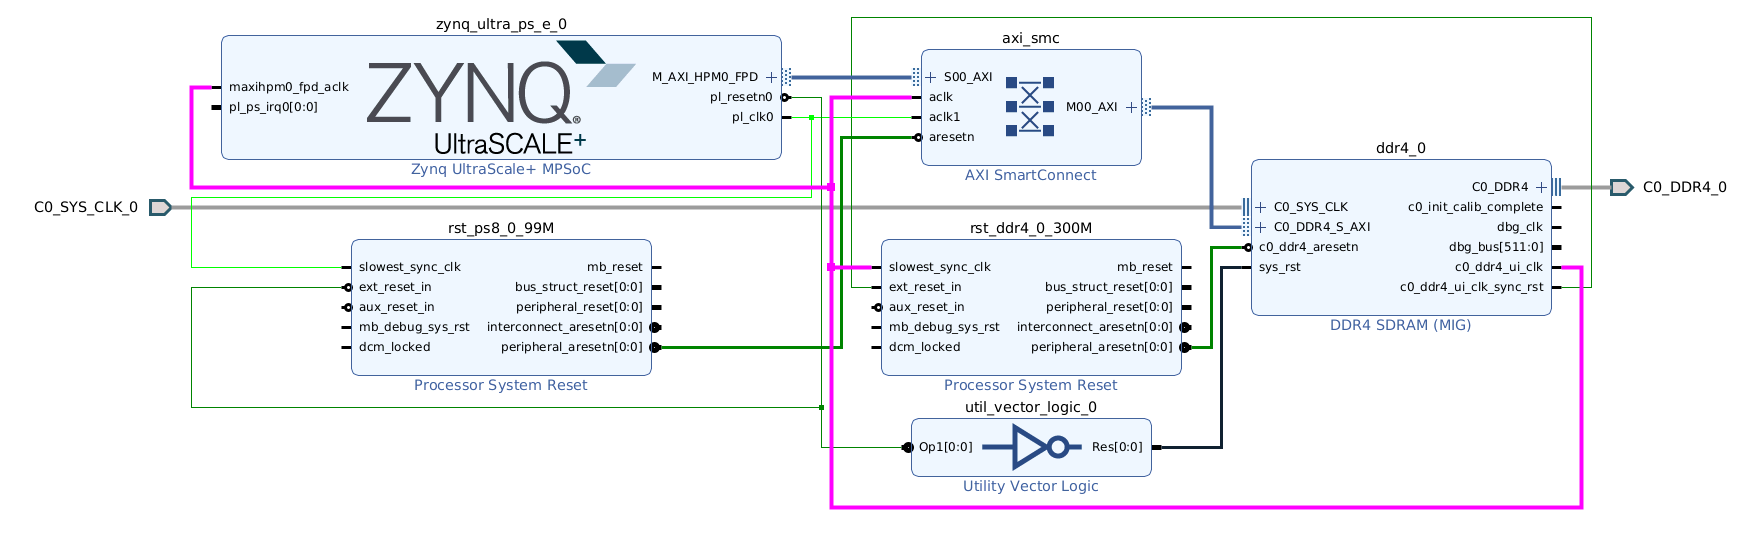
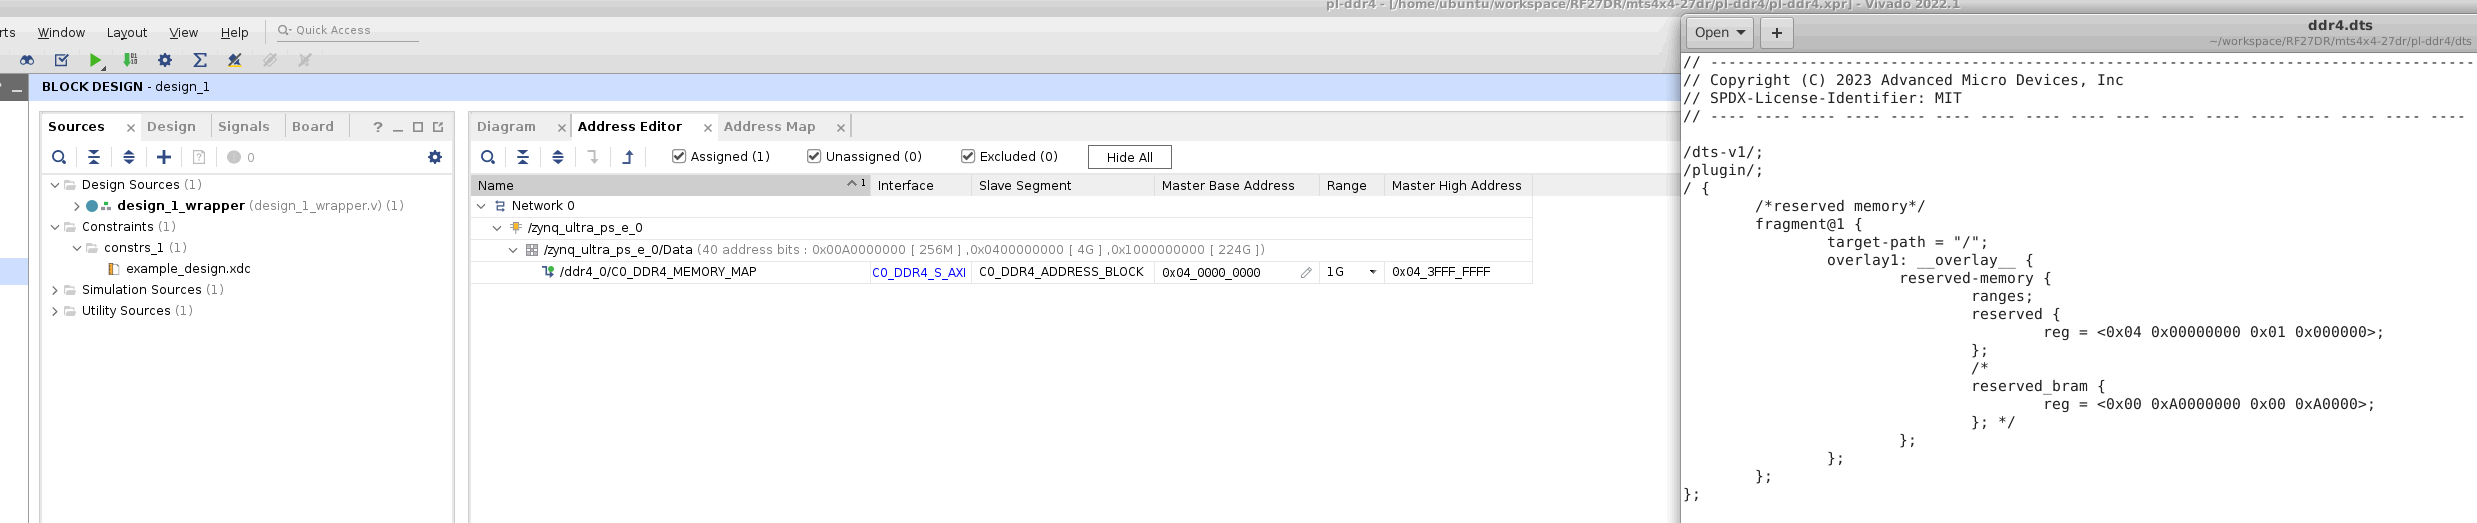

In [1]:
import pynq
from pynq import Overlay

In [2]:
dts = pynq.DeviceTreeSegment('./ddr4.dtbo')
dts.insert()

In [3]:
ol = Overlay('./overlay/pl_ddr4.bit')

In [5]:
#ol.mem_dict

## test case 1: MMIO directly write and read

In [6]:
ddr4 = pynq.MMIO(ol.mem_dict['ddr4_0']['phys_addr'], ol.mem_dict['ddr4_0']['addr_range'])

In [7]:
data = [1688825099, 2688825099, 1588825099, 588825099, 1488825099, 1388825099, 1478825099, 1484825099]

In [8]:
data

[1688825099,
 2688825099,
 1588825099,
 588825099,
 1488825099,
 1388825099,
 1478825099,
 1484825099]

In [9]:
for i in range(8):
    ddr4.write(i*4, data[i])

In [10]:
readback=[]
for i in range(8):
    readback.append(ddr4.read(i*4, length=4))

In [11]:
readback

[1688825099,
 2688825099,
 1588825099,
 588825099,
 1488825099,
 1388825099,
 1478825099,
 1484825099]

## test case 2: allocate 

In [12]:
from pynq import allocate
import numpy as np
numSamplesPerDMA = (8 << 20)-1 # 8 MSample = 16MB
dbuf16 = allocate(numSamplesPerDMA, dtype=np.int16, target=ol.ddr4_0)

In [13]:
dbuf = range(-32768, -32768+32768*2)

In [14]:
dbuf[0]

-32768

In [15]:
dbuf[32768]

0

In [16]:
dbuf[32768*2-1]

32767

In [17]:
# for i in range(1024):
#     print(dbuf[i])

In [18]:
dbuf32 = allocate(8, dtype=np.int32, target=ol.ddr4_0)

In [19]:
dbuf32 = data

In [20]:
for i in range(8):
    print(dbuf32[i])

1688825099
2688825099
1588825099
588825099
1488825099
1388825099
1478825099
1484825099


## deep memory allocate

In [21]:
dbuf32_16M = allocate(numSamplesPerDMA*2, dtype=np.int32, target=ol.ddr4_0)

In [22]:
dbuf32_16M[numSamplesPerDMA:numSamplesPerDMA+8] = data

due to values of int32 in [-2,147,483,648 2,147,483,647], so the 2688825099 will not correctly display

In [23]:
for i in range(8):
    print(dbuf32_16M[numSamplesPerDMA+i])

1688825099
-1606142197
1588825099
588825099
1488825099
1388825099
1478825099
1484825099


### max allocate ability test

In [24]:
dbuf16_512M = allocate(numSamplesPerDMA*64, dtype=np.int16, target=ol.ddr4_0)

max 1024MB memory can allocated! Must be reboot and have dts = pynq.DeviceTreeSegment('./ddr4.dtbo') dts.insert() before bitstream loaded

# test case 3: MMIO far 2G area

2G = 0x8000_0000, 
last 16k (0x4000) int32, address base = 0x8000_0000 - 0x1_0000 = 0x7FFF_0000

In [25]:
far_16k_baseAddress = 0x80000000 - 0x10000
ddr4_far_16k = pynq.MMIO(ol.mem_dict['ddr4_0']['phys_addr'] + far_16k_baseAddress, 0x4000)

In [26]:
for i in range(8):
    ddr4_far_16k.write(i*4, data[i])

In [27]:
readback=[]
for i in range(8):
    readback.append(ddr4_far_16k.read(i*4, length=4))

In [28]:
readback

[1688825099,
 2688825099,
 1588825099,
 588825099,
 1488825099,
 1388825099,
 1478825099,
 1484825099]